In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../7_unit/7.01/learningSet.csv')
data_c = data.copy()
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [4]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [5]:
# check the unique Value counts at each feature. Not checking all just for having it for some rows
for column in data:
    print(data[column].value_counts())

9501    15358
8601    14596
9401    12065
9601    10122
9101     8552
9001     7718
9201     7539
8801     6669
8901     5342
9301     3921
8701     3451
9701       15
9509        4
9209        4
9212        3
9410        3
9510        3
8912        2
9109        2
9310        2
8501        2
9506        2
9309        2
8910        2
9009        2
9202        2
9302        2
9003        1
9205        1
8909        1
9402        1
9011        1
8707        1
9012        1
8612        1
8604        1
9312        1
9303        1
8401        1
9103        1
8609        1
8702        1
9512        1
8704        1
9010        1
8611        1
8711        1
9102        1
8608        1
9111        1
9511        1
8810        1
8804        1
8306        1
Name: ODATEDW, dtype: int64
MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: OSOURCE, Length: 896, dtype: int64
0        40917
1        25691
2        1700

0     79619
1     11537
2      1898
3       860
4       519
5       330
6       185
7        98
9        66
8        65
10       40
11       29
12       29
14       15
13       12
15       11
20       10
17        9
16        7
23        7
29        6
18        6
22        5
37        4
39        4
19        4
44        4
26        4
27        3
30        3
21        3
28        3
42        3
41        2
36        2
38        1
50        1
24        1
46        1
49        1
48        1
33        1
57        1
47        1
45        1
Name: ETH14, dtype: int64
0     87781
1      5360
2       851
3       257
4       218
      ...  
73        1
44        1
81        1
48        1
51        1
Name: ETH15, Length: 78, dtype: int64
0     42870
1     26130
2     11005
3      5803
4      3147
      ...  
62        1
68        1
73        1
51        1
63        1
Name: ETH16, Length: 66, dtype: int64
33    8125
32    7979
31    7682
34    7275
30    6713
      ... 
13       2
81       1
83    

Name: EC3, Length: 63, dtype: int64
31    3897
32    3840
30    3839
29    3785
34    3738
      ... 
90       1
88       1
78       1
74       1
68       1
Name: EC4, Length: 80, dtype: int64
23    5519
21    5498
22    5365
20    5350
19    5101
      ... 
83       1
73       1
66       1
55       1
58       1
Name: EC5, Length: 69, dtype: int64
6     11711
5     11333
7     11078
4      9925
8      9476
9      7693
3      7543
10     5681
2      4956
11     4005
0      2637
12     2546
1      2127
13     1869
14      995
15      676
16      436
17      265
18      163
19       94
20       75
21       41
22       24
23       20
24       14
30        8
28        6
35        3
27        3
29        2
31        2
32        1
37        1
25        1
34        1
33        1
Name: EC6, dtype: int64
7     5515
6     5361
8     5210
5     5125
9     4641
      ... 
58       4
67       4
99       4
56       1
61       1
Name: EC7, Length: 61, dtype: int64
3     10822
2     10012
4      9762
5

9511.0    5471
9512.0    3980
9601.0     682
9602.0     217
9603.0     107
9805.0       2
9806.0       1
9510.0       1
Name: RDATE_10, dtype: int64
9511.0    7010
9510.0    4465
9512.0    2299
9601.0     636
9602.0     167
9603.0     128
9509.0      29
9604.0       2
9605.0       1
9608.0       1
9607.0       1
9805.0       1
Name: RDATE_11, dtype: int64
9509.0    13496
9510.0     6356
9512.0     2754
9511.0     2046
9601.0      768
9602.0      185
9603.0       92
9609.0        1
9605.0        1
9806.0        1
Name: RDATE_12, dtype: int64
9508.0    7396
9507.0    2584
9509.0    1343
9510.0     399
9511.0     180
9512.0     150
9601.0      82
9603.0      36
9502.0      28
9503.0      26
9602.0      21
9504.0       3
9506.0       1
9505.0       1
Name: RDATE_13, dtype: int64
9506.0    13533
9507.0     6360
9508.0     1482
9509.0      777
9510.0      380
9512.0      273
9511.0      238
9601.0      136
9602.0       58
9603.0       51
9505.0       28
9406.0        1
Name: RDATE_14, dtype:

In [6]:
# checking the column names 
for column in data.columns:
    print(column)

ODATEDW
OSOURCE
TCODE
STATE
ZIP
MAILCODE
PVASTATE
DOB
NOEXCH
RECINHSE
RECP3
RECPGVG
RECSWEEP
MDMAUD
DOMAIN
CLUSTER
AGE
AGEFLAG
HOMEOWNR
CHILD03
CHILD07
CHILD12
CHILD18
NUMCHLD
INCOME
GENDER
WEALTH1
HIT
MBCRAFT
MBGARDEN
MBBOOKS
MBCOLECT
MAGFAML
MAGFEM
MAGMALE
PUBGARDN
PUBCULIN
PUBHLTH
PUBDOITY
PUBNEWFN
PUBPHOTO
PUBOPP
DATASRCE
MALEMILI
MALEVET
VIETVETS
WWIIVETS
LOCALGOV
STATEGOV
FEDGOV
SOLP3
SOLIH
MAJOR
WEALTH2
GEOCODE
COLLECT1
VETERANS
BIBLE
CATLG
HOMEE
PETS
CDPLAY
STEREO
PCOWNERS
PHOTO
CRAFTS
FISHER
GARDENIN
BOATS
WALKER
KIDSTUFF
CARDS
PLATES
LIFESRC
PEPSTRFL
POP901
POP902
POP903
POP90C1
POP90C2
POP90C3
POP90C4
POP90C5
ETH1
ETH2
ETH3
ETH4
ETH5
ETH6
ETH7
ETH8
ETH9
ETH10
ETH11
ETH12
ETH13
ETH14
ETH15
ETH16
AGE901
AGE902
AGE903
AGE904
AGE905
AGE906
AGE907
CHIL1
CHIL2
CHIL3
AGEC1
AGEC2
AGEC3
AGEC4
AGEC5
AGEC6
AGEC7
CHILC1
CHILC2
CHILC3
CHILC4
CHILC5
HHAGE1
HHAGE2
HHAGE3
HHN1
HHN2
HHN3
HHN4
HHN5
HHN6
MARR1
MARR2
MARR3
MARR4
HHP1
HHP2
DW1
DW2
DW3
DW4
DW5
DW6
DW7
DW8
DW9
HV1
HV2
HV3
HV4
HU1


In [7]:
# displaying the column description
from IPython.display import IFrame
plot_fn = '../7_unit/7.01/variables_description_1.pdf'
IFrame(plot_fn, width=800, height=400)

In [8]:
# displaying the column description
from IPython.display import IFrame
plot_fn = '../7_unit/7.01/variables_description_2.pdf'
IFrame(plot_fn, width=800, height=400)

In [9]:
# give me all columns with missing values
null = data[data.columns[data.isnull().any()]]

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,...,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,NEXTDATE,TIMELAG,CLUSTER2,GEOCODE2
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,9.0,9003.0,4.0,39.0,C
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9504.0,18.0,1.0,A
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,8.0,7.0,6.0,9101.0,12.0,60.0,C
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,6.0,11.0,NaN,NaN,NaN,8711.0,9.0,41.0,C
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8005.0,14.0,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,C
95408,48.0,1.0,7.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,A
95409,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,9501.0,3.0,34.0,B
95410,58.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.0,20.0,NaN,NaN,8704.0,4.0,11.0,A


In [9]:
## fill all RAMNT columns with nulls and drop almost all date columns to reduce features. 
## Turns out later i have to be much more aggressive. 


col_td = []
for col in null.columns:
    if 'RAMNT' in col:
        null[col] = null[col].fillna(0)
    elif 'ADATE_' in col:
        col_td.append(col)
        null = null.drop(col, 1)
    elif 'RDATE_' in col:
        col_td.append(col)
        null = null.drop(col, 1)

In [10]:
# showing the remaining columns with nulls
nulls = pd.DataFrame(null.isna().sum(),columns=['Measure'])
nulls = nulls[nulls['Measure']>0]
nulls 

,Measure
AGE,23665
NUMCHLD,83026
INCOME,21286
WEALTH1,44732
MBCRAFT,52854
MBGARDEN,52854
MBBOOKS,52854
MBCOLECT,52914
MAGFAML,52854
MAGFEM,52854


In [11]:
# filling all missing values in PUB and MB Columns with 0.0 because i intentionally want to 
# to keep this columns because they could be interessting features. 
# But also have many new nulls in there now.

for col in null.columns:
    if 'MB' in col:
        null[col] = null[col].fillna(0.0)
    elif 'PUB' in col:
        null[col] = null[col].fillna(0.0)

In [13]:
# filling the rest of my null table with nulls
for col in null.columns:
    null[col] = null[col].fillna(0)      

In [14]:
# fitting my remaining null column to the dataset und drop the ones i wanted to drop
# also setting index
columns_to_overwrite = null.columns
data.drop(labels=columns_to_overwrite, axis="columns", inplace=True)
data[columns_to_overwrite] = null[columns_to_overwrite]
data.drop(labels=col_td, axis="columns", inplace=True)
data = data.set_index('CONTROLN')
data


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,NEXTDATE,TIMELAG,CLUSTER2,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0.0,0.0,0.0,11.0,9.0,9003.0,4.0,39.0,C
148535,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0.0,0.0,0.0,0.0,0.0,9504.0,18.0,1.0,A
15078,9001,AMH,1,NC,27017,,,0,0,,...,0.0,0.0,0.0,8.0,7.0,6.0,9101.0,12.0,60.0,C
172556,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,6.0,11.0,0.0,0.0,0.0,8711.0,9.0,41.0,C
7112,8601,,0,FL,33176,,,2001,0,X,...,0.0,0.0,0.0,0.0,0.0,0.0,8005.0,14.0,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,C
122706,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,A
189641,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,0.0,0.0,5.0,0.0,0.0,9501.0,3.0,34.0,B


In [17]:
# dropping the targes and get dummies which are a lot ( and also too many which we see later for
# processing)
X = data.drop(['TARGET_B', 'TARGET_D',],axis=1)
y = data['TARGET_D']
X = pd.get_dummies(X)
X

,ODATEDW,TCODE,DOB,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,...,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_0.0,GEOCODE2_,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,8901,0,3712,0,0,39,34,18,10,2,...,0,0,0,1,0,0,0,0,1,0
148535,9401,1,5202,16,0,15,55,11,6,2,...,0,0,0,1,0,0,1,0,0,0
15078,9001,1,0,2,0,20,29,33,6,8,...,0,0,0,1,0,0,0,0,1,0
172556,8701,0,2801,2,0,23,14,31,3,0,...,0,0,0,1,0,0,0,0,1,0
7112,8601,0,2001,60,1,28,9,53,26,3,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,9601,1,0,0,14,36,47,11,7,8,...,0,0,0,1,0,0,0,0,1,0
122706,9601,1,5001,1,0,31,43,19,4,1,...,0,0,0,1,0,0,1,0,0,0
189641,9501,1,3801,0,0,18,46,20,7,23,...,0,0,0,1,0,0,0,1,0,0


In [19]:
# first train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# fitting the model. processing duration was over an hour and kernel died some times because 
# used RAM was close to the edge

from datetime import datetime
print(datetime.now())

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
print(datetime.now())

2022-02-18 18:14:31.868147
2022-02-18 19:21:56.882254


In [21]:
# Not good scores at all

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds, squared=False)
mae, mse

(17610.207308957833, 205741.1738939607)

<AxesSubplot:ylabel='TARGET_D'>

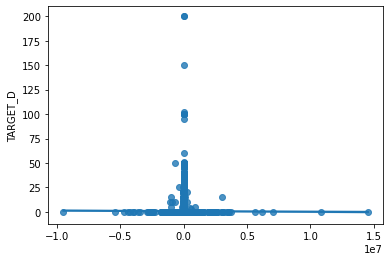

In [22]:
# nulls are a thing 
sns.regplot(preds, y_test)

In [23]:
# Trying to use KBest selector to get just features which have good correlation to TARGET_D
# Also X.shape before.
from sklearn.feature_selection import SelectKBest, chi2
X.shape

(95412, 23585)

In [24]:
# Selecting 25 best features via chi2 and show me the features
y = y.astype('int')
selector = SelectKBest(chi2, k=25)
X_new = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
for column in features_df_new.columns:
    print(column)

TCODE
DOB
POP901
POP902
POP903
HV1
HV2
IC1
IC2
IC3
IC4
IC5
RAMNTALL
MAXRAMNT
LASTGIFT
AVGGIFT
MSA
RAMNT_4
NEXTDATE
ZIP_29207
ZIP_40347
ZIP_49841-
ZIP_68501
ZIP_87043
MDMAUD_L2LM


In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [26]:
# Processing was obviously much shorter and scores way better but still more for low 
# amount donation not far away from null 
print(datetime.now())
model = LinearRegression()
model.fit(X_train1,y_train1)
model.score(X_test1,y_test1)
print(datetime.now())

2022-02-18 19:23:13.253814
2022-02-18 19:23:13.317187


In [27]:
preds1 = model.predict(X_test1)
mae1 = mean_absolute_error(y_test1, preds1)
mse1 = mean_squared_error(y_test1, preds1, squared=False)
mae1, mse1

(1.5021956165634367, 4.558633919333329)

<AxesSubplot:ylabel='TARGET_D'>

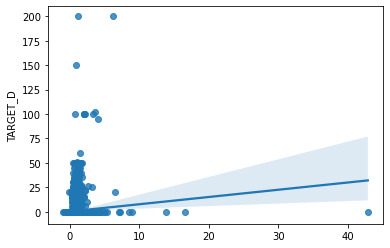

In [28]:
sns.regplot(preds1, y_test1)

In [30]:
# i also tried different methods like RFE but every time i had problems with RAM even using
# Colab Premium so i will start a different approach with sorting out features more aggressive

from sklearn.svm import SVR
from sklearn.feature_selection import RFE
estimator = SVR(kernel="linear")
selector1 = RFE(estimator, step=1)
X_RFE = selector1.fit_transform(X, y)

MemoryError: Unable to allocate 16.8 GiB for an array with shape (23585, 95412) and data type float64

In [4]:
data_c

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [5]:
cols_to_keep = list((data_c.isna().sum()*100/len(data_c)) < 10)
data_c = data_c.iloc[:,cols_to_keep]

In [6]:
d_no_nulls = data_c.fillna(0)
d_no_nulls

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [7]:
dcat = d_no_nulls.select_dtypes(object)
dnum = d_no_nulls.select_dtypes(np.number)

In [8]:
# reducing as well the columns with many category except the state
remove_cols = []

for col in dcat:
    if (len(dcat[col].unique()) > 50) and dcat[col].name != 'STATE':
        # display(dcat[col].value_counts())
        remove_cols.append(col)
        
len(remove_cols)

23

In [9]:
remove_cols.extend(['TARGET_B', 'TARGET_D'])
d_no_nulls = d_no_nulls.set_index('CONTROLN')

In [23]:
# 656 is a much better number to process then 23k something
X = d_no_nulls.drop(columns=remove_cols)
y = d_no_nulls['TARGET_D']
X = pd.get_dummies(X)
y.shape

(95412,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from datetime import datetime
print(datetime.now())

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
print(datetime.now())

2022-02-22 12:09:39.512208
2022-02-22 12:09:42.445395


In [13]:
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds, squared=False)
mae, mse

(1.518471244757123, 4.6013216090078375)

<AxesSubplot:ylabel='TARGET_D'>

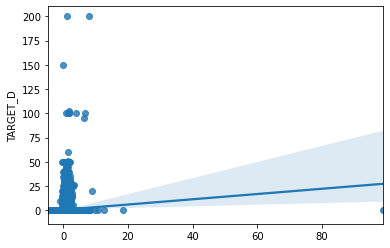

In [14]:
sns.regplot(preds, y_test)

In [15]:
# trying a dimension reduction via Factor Analysis. I chose 25 Features. Processing was quite fast.
print(datetime.now())
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=25, random_state=0)
X_transformed = transformer.fit_transform(X)

print(datetime.now())

2022-02-22 12:09:52.869145
2022-02-22 12:11:25.660923


In [16]:
X_transformed.shape

(95412, 25)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
print(datetime.now())
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
print(datetime.now())

2022-02-22 12:11:33.868502
2022-02-22 12:11:33.915839


In [18]:
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds, squared=False)
mae, mse

(1.4992579348541195, 4.5601174220623655)

<AxesSubplot:ylabel='TARGET_D'>

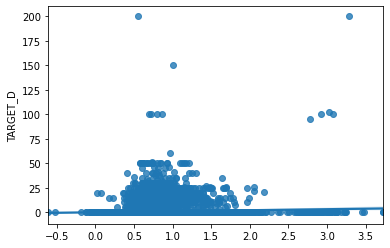

In [19]:
sns.regplot(preds, y_test)

In [20]:
pd.DataFrame(X_transformed).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,...,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04,9.541200e+04
mean,-1.443993e-16,1.409905e-16,1.264725e-17,6.306938e-17,-2.487029e-16,1.064703e-17,-3.074774e-16,-3.759186e-17,-3.797098e-16,5.562687e-16,...,-2.952446e-15,-5.255791e-17,1.659927e-16,4.025193e-16,-5.244248e-16,8.460965e-16,-1.182378e-15,1.315651e-15,-5.752971e-15,-3.606738e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,9.998435e-01,9.986194e-01,9.982709e-01,9.980227e-01,9.962415e-01,9.922708e-01,9.892488e-01,9.832843e-01,9.827869e-01,9.689323e-01
min,-5.586866e-02,-2.449910e+00,-7.987745e-01,-7.036852e-01,-1.812436e+00,-2.467637e+00,-2.868433e+00,-2.748515e+00,-3.501610e+00,-4.080892e+00,...,-3.075121e+00,-1.030612e+01,-6.020772e+00,-7.999703e+00,-7.959549e+00,-4.319538e+00,-5.183570e+00,-4.230000e+00,-3.530159e+00,-8.483775e+00
25%,-5.567197e-02,-5.832550e-01,-3.982315e-01,-4.412195e-01,-2.108681e-01,-8.801002e-01,-9.393146e-01,-3.887483e-01,-2.574755e-02,-2.616820e-02,...,-5.702991e-01,-5.276875e-01,-5.382669e-01,-4.373164e-01,-2.983884e-01,-4.753727e-01,-6.141883e-01,-6.986974e-01,-7.252011e-01,-6.168315e-01
50%,-5.562527e-02,-2.269276e-01,-2.862363e-01,-3.830716e-01,-1.973571e-01,1.115375e-01,-3.319839e-02,-8.216036e-02,-1.862924e-03,3.912982e-02,...,-1.541740e-01,3.909225e-02,-2.967804e-01,-1.075385e-01,1.500358e-01,5.113056e-02,-8.718098e-02,-1.302783e-01,3.710075e-03,-4.170764e-02
75%,-5.555590e-02,2.895432e-01,-2.074397e-02,-3.217828e-01,-1.873901e-01,1.024112e+00,8.231345e-01,2.068633e-01,2.111633e-02,1.099164e-01,...,2.114441e-01,6.055821e-01,1.188384e-01,3.000958e-01,5.784271e-01,4.566461e-01,4.455777e-01,5.716862e-01,7.014695e-01,5.118500e-01
max,1.798799e+01,1.845364e+01,1.612521e+01,5.695249e+00,3.976517e+00,4.300163e+00,3.603851e+00,7.710614e+00,5.946270e+00,8.031078e+00,...,1.161541e+01,1.660421e+01,6.272717e+00,8.048557e+00,1.291222e+01,1.199895e+01,1.811536e+01,8.483890e+00,5.632868e+00,9.024405e+00


In [21]:
# Fitting again the regression model and getting even slightly better scores because the Factor Analysis 
# kind of scaled the information while transforming but now its enough with linear regression and i will 
# go on with logistic regression


In [25]:
y = d_no_nulls['TARGET_B']
y.shape

(95412,)

In [28]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
fa = FactorAnalysis(n_components=25, random_state=0)
smt = SMOTE(random_state=42)
model = LogisticRegression(n_jobs=7)
pipeline = Pipeline([('smt', smt), ('fa', fa), ('model', model)])


pipeline.fit(X_train, y_train)

MemoryError: Unable to allocate 300. MiB for an array with shape (59950, 656) and data type float64